# Maestria en Ciencia de Datos

## Machine Learning 1

### Proyecto 1 - Relación Minutos Ingreso

### Maria Angélica Robayo Torres

Mediante la exploración de un conjunto de datos dado se espera poder identificar si existen relaciones entre las diferentes variables que nos permita detectar alguna tendencia. 

0. Inicialmente importaremos las librerías necesarias para analizar el conjunto de datos

In [150]:
# Primero se importaran las librerias requeridas para el tratamiento de la información, pandas, matplotlib, seaborn y plotly
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option ('display.max_columns',None)

1. Realizaremos el cargue y lectura del conjunto de datos y lo almacenaremos en la variable "df"

In [152]:
#leyendo el conjunto de datos y almacenandolo en la variable df
df = pd.read_csv ('Credito_dias.csv')

In [153]:
df

,totmou,totrev,creditcd,eqpdays,Customer_ID
0,7269.0,906.58,Y,371,1082423
1,13552.0,1172.25,N,83,1069232
2,4152.0,577.39,Y,675,1031705
3,1863.0,294.26,Y,218,1089806
4,4155.0,433.16,N,222,1076695
...,...,...,...,...,...
9995,2570.0,484.31,Y,611,1027614
9996,2105.0,583.36,Y,1243,1098422
9997,3690.0,294.29,Y,212,1096497
9998,3333.0,233.08,Y,290,1087248


2. Analisis exploratorio del conjunto de datos

Revisando el tipo de variables: para ello utilizamos la función dtypes que nos indica que el conjunto de datos tiene dos variables de tipo flotante, dos de tipo entero y una de tipo string (la presenta como object, pero segun vemos en la muestra desplegable es un texto).

Dimensión del conjunto de datos: el conjunto de datos esta compuesto por 5 columnas / variables y un total de 10000 registros.

Descripción: utilizando la función describe y is.null podemos identificar que la variable creditcd (Indicador de tarjeta de crédito) tiene valores nulos ya que en el conteo deberia ser igual a 10000 pero unicamente dice que tiene 9848 registros validos, el restante aparecen como Nan. Se tiene que en promedio los clientes usan un total aproximado de 7693 minutos. El ingreso promedio de los clientes es de aproximadamente 1042. Los dias promedio de antiguedad de los clientes es de aproximadamente 387. Otra situación que se puede observar con respecto a la descripción de los datos, es que la variable de antiguedad tiene un valor minimo de -5 lo que no tiene sentido y puede ser un error de digitación.

In [156]:
# Revisando los tipos de variables que contiene el dataset
df.dtypes

totmou         float64
totrev         float64
creditcd        object
eqpdays          int64
Customer_ID      int64
dtype: object

In [157]:
# Revisando las dimensiones del dataset
df.info

<bound method DataFrame.info of        totmou   totrev creditcd  eqpdays  Customer_ID
0      7269.0   906.58        Y      371      1082423
1     13552.0  1172.25        N       83      1069232
2      4152.0   577.39        Y      675      1031705
3      1863.0   294.26        Y      218      1089806
4      4155.0   433.16        N      222      1076695
...       ...      ...      ...      ...          ...
9995   2570.0   484.31        Y      611      1027614
9996   2105.0   583.36        Y     1243      1098422
9997   3690.0   294.29        Y      212      1096497
9998   3333.0   233.08        Y      290      1087248
9999   5025.0  1436.49        Y     1029      1099003

[10000 rows x 5 columns]>

In [158]:
df.describe(include='all')

,totmou,totrev,creditcd,eqpdays,Customer_ID
count,10000.000000,10000.000000,9848,10000.000000,1.000000e+04
unique,NaN,NaN,2,NaN,NaN
top,NaN,NaN,Y,NaN,NaN
freq,NaN,NaN,6796,NaN,NaN
mean,7692.804866,1042.133807,NaN,386.794500,1.049965e+06
std,8657.917883,857.144895,NaN,252.720196,2.879424e+04
min,0.000000,11.100000,NaN,-5.000000,1.000014e+06
25%,2576.000000,526.787500,NaN,210.000000,1.025053e+06
50%,5262.000000,820.235000,NaN,338.000000,1.049652e+06
75%,9823.250000,1272.975000,NaN,522.000000,1.074798e+06


In [159]:
df.isnull().any(axis=0)

totmou         False
totrev         False
creditcd        True
eqpdays        False
Customer_ID    False
dtype: bool

In [160]:
df['creditcd'].value_counts(dropna=False)

creditcd
Y      6796
N      3052
NaN     152
Name: count, dtype: int64

Para limpiar un poco los datos, en la variable creditcd cambiaremos los valores NaN por "Sin Informacion" y en la variable eqpdays eliminaremos todos los valores negativos.

In [162]:
df.drop(df[(df['eqpdays']<0)].index, inplace=True)

In [196]:
df['creditcd'].fillna('Sin Informacion', inplace=True)

C:\Users\Maria Robayo\AppData\Local\Temp\ipykernel_24960\3186356906.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['creditcd'].fillna('Sin Informacion', inplace=True)


In [198]:
df.isnull().any(axis=0)

totmou         False
totrev         False
creditcd       False
eqpdays        False
Customer_ID    False
dtype: bool

In [200]:
df.describe(include='all')

,totmou,totrev,creditcd,eqpdays,Customer_ID
count,9982.000000,9982.000000,9982,9982.000000,9.982000e+03
unique,NaN,NaN,3,NaN,NaN
top,NaN,NaN,Y,NaN,NaN
freq,NaN,NaN,6782,NaN,NaN
mean,7676.060168,1040.922504,NaN,387.496694,1.049981e+06
std,8645.835975,856.470810,NaN,252.405854,2.879116e+04
min,0.000000,11.100000,NaN,0.000000,1.000014e+06
25%,2574.250000,526.462500,NaN,210.250000,1.025057e+06
50%,5251.500000,819.675000,NaN,338.000000,1.049702e+06
75%,9801.500000,1271.530000,NaN,523.000000,1.074802e+06


In [248]:
df['creditcd'].value_counts(dropna=False)

creditcd
Y                  6782
N                  3048
Sin Informacion     152
Name: count, dtype: int64

Luego de la eliminación de estos valores podemos y de volver a correr la función describe tenemos una dataset con 9982 registros de información para las 5 variables.

Para identificar si hay una relación entre el total de minutos usados por el cliente con la compañía y el ingreso total de los clientes, realizaremos un analisis exploratorio de las variables con ayuda de gráficos.

3. Analisis exploratorio de las variables del dataset utilizando gráficos

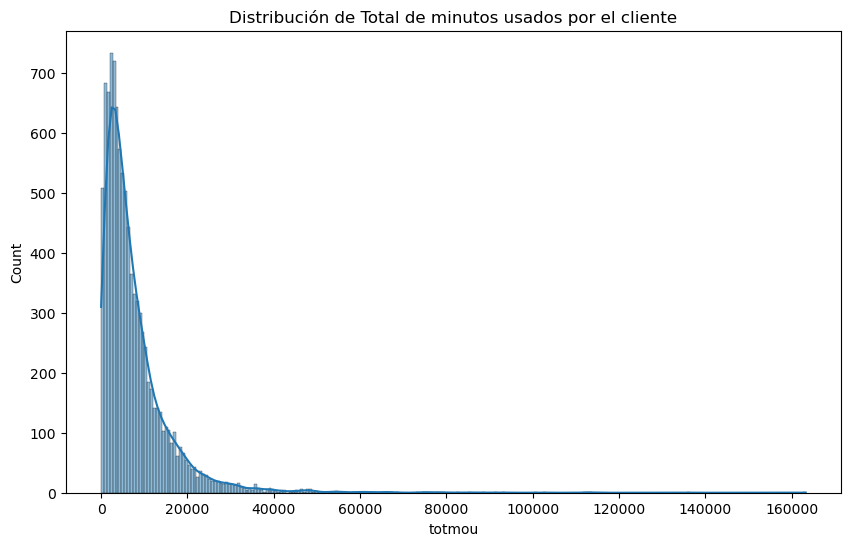

In [167]:
# Histograma de la variable "totmou"
plt.figure(figsize=(10, 6))
sns.histplot(df['totmou'], kde=True)
plt.title('Distribución de Total de minutos usados por el cliente')
plt.show()

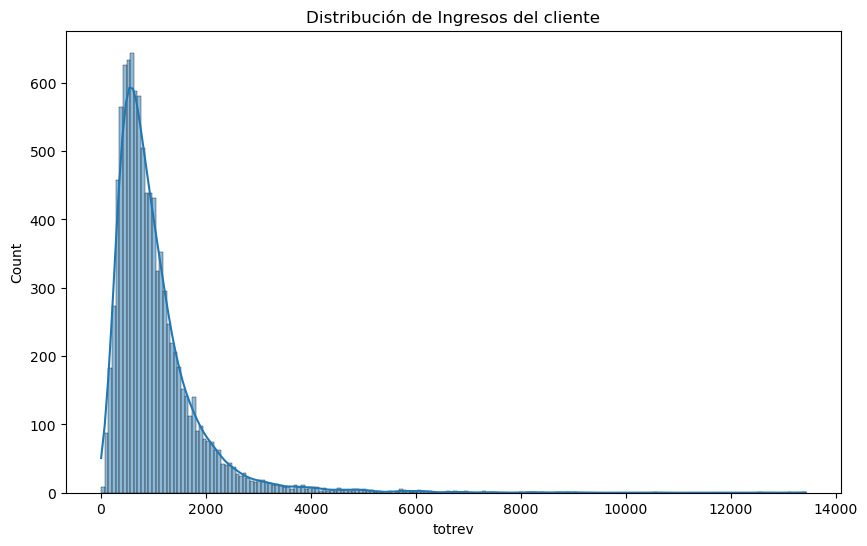

In [168]:
# Histograma de la variable "totrev"
plt.figure(figsize=(10, 6))
sns.histplot(df['totrev'], kde=True)
plt.title('Distribución de Ingresos del cliente')
plt.show()

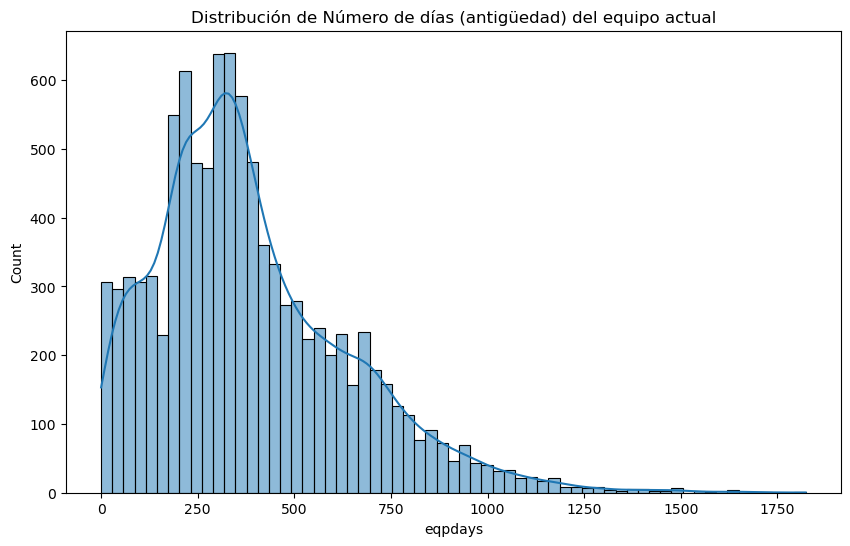

In [202]:
# Histograma de la variable "eqpdays"
plt.figure(figsize=(10, 6))
sns.histplot(df['eqpdays'], kde=True)
plt.title('Distribución de Número de días (antigüedad) del equipo actual')
plt.show()

C:\Users\Maria Robayo\AppData\Local\Temp\ipykernel_24960\412911749.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(df['creditcd'].value_counts(),kind="bar",palette="viridis")


<Figure size 1000x600 with 0 Axes>

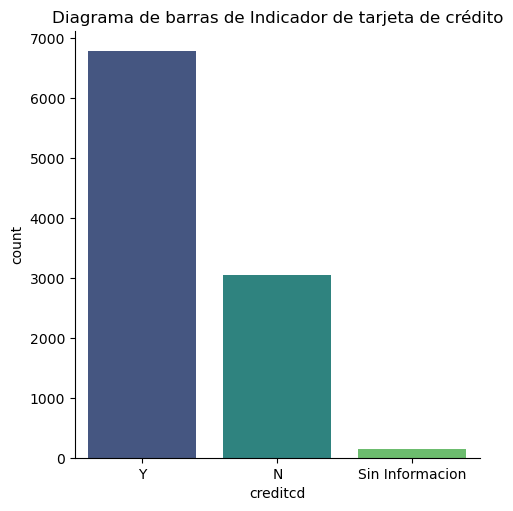

In [246]:
# Diagrama de barras de la variable 'creditcd'
plt.figure(figsize=(10, 6))
sns.catplot(df['creditcd'].value_counts(),kind="bar",palette="viridis")
plt.title('Diagrama de barras de Indicador de tarjeta de crédito')
plt.show()

Conclusiones del analisis exploratorio con gráficas:

Con respecto a las variables totmou y totrev podemos inferir que la presencia de varios datos atípicos altos hacen que las distribuciones se vean muy sesgadas a la izquierda, al calcular la asmetria y curtosis de las distribuciones tambien podemos corroborar esta situación, una recomendación que podria sugerir el analista del conjunto de datos es la eliminación de un rango de datos especifico que permita tener un comportamiento normal para estas variables.

Con respecto a la variable eqpdays tambien se observa un sesgo moderado a la izquierda, y al calcular el valor de la curtosis se valida que se trata de una distribución platicurtica y se corrobora al observar sus colas ligeras, es decir que para esta variable tenemos menos valores concentrados en torno a la media.


In [261]:
df['totmou'].skew()

4.346300329994651

In [263]:
df['totmou'].kurt()

37.580693439138585

In [265]:
df['totrev'].skew()

3.659989665977463

In [267]:
df['totrev'].kurt()

25.76201272212544

In [269]:
df['eqpdays'].skew()

1.0301929369622138

In [271]:
df['eqpdays'].kurt()

1.418401701159226

4. Diagrama de dispersión entre las variables totrev y totmou

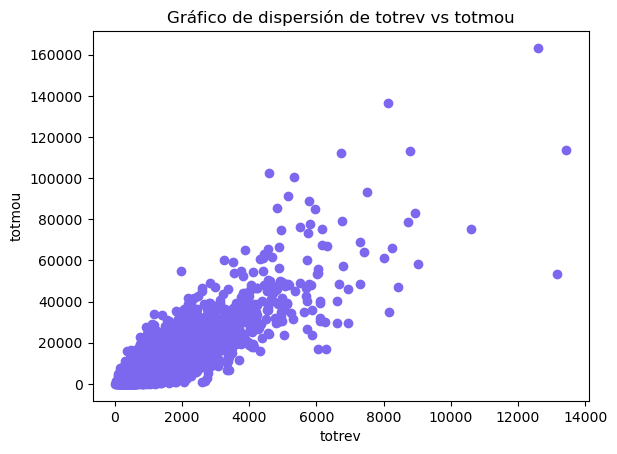

In [242]:
### Gráfico de dispersión

plt.scatter(df['totrev'], df['totmou'], color='mediumslateblue')
plt.xlabel('totrev')
plt.ylabel('totmou')
plt.title('Gráfico de dispersión de totrev vs totmou')
plt.show()

In [281]:
df_corr=df[['totrev','totmou']]

In [283]:
df_corr.corr()

,totrev,totmou
totrev,1.000000,0.835982
totmou,0.835982,1.000000


¿Existe relación alguna entre el total de minutos usados con la compañía y el ingreso total de los clientes?

De acuerdo con la gráfica de correlación se observa que si existe una relación directa entre las variables totrev y totmou, es decir, a un mayor valor de ingresos existe un mayor valor de minutos usados por el cliente. Adicionalmente se calcularon los coeficientes de correlación obteniendo un valor de 0.835982 lo que confirma una correlación positiva muy alta.


<Axes: xlabel='totrev', ylabel='totmou'>

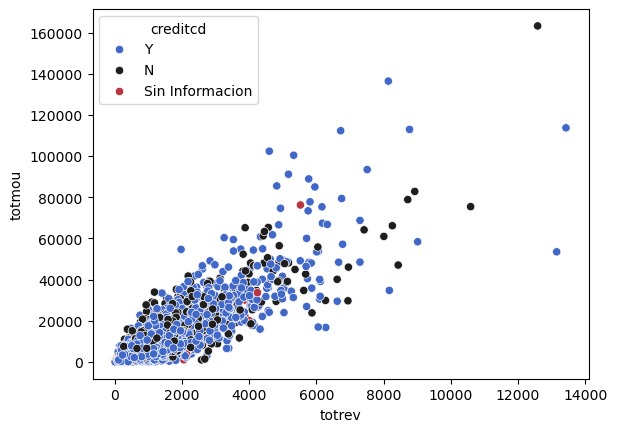

In [224]:
### Scatterplot para tres variables

sns.scatterplot(x='totrev', y='totmou', hue='creditcd', data=df, palette='icefire')

¿El hecho de tener crédito afecta alguna de estas dos variables?

De acuerdo con el gráfico de correlación anterior y considerando tambien lo observado en el gráfico de barras de la varieble creditcd del analisis exploratorio podemos concluir que no hay una afectación de las variables previamente analizadas, pero si podriamos pensar que la mayoria de clientes utilizan su tarjeta de crédito para adquirir su equipo o plan en la empresa de telecomunicaciones.